# cuDF - RAPIDS



# Installation

> Method 1 - Local Installation

Single installation command: it is possible to install RAPIDS through a single command, however, it will be customized according to your environment and system, which you can obtain here:
https://docs.rapids.ai/install#selector - Go to section “Install RAPIDS”

For this method you can use Conda or Docker. The command will be generated according to the Python or CUDA version you specify. It is important to emphasize that depending on the system and configuration, these methods may require additional configurations in the execution environment (the same link above has more information about the attention you should pay for each type of environment).

If you are running locally, a good tip to keep it running without worrying too much about configurations is to use NVIDIA's NGC containers: https://catalog.ngc.nvidia.com/orgs/nvidia/containers/tensorflow


> Method 2 - Google Colab Installation

Since we are running on Colab, we have a more practical and faster way, which is through a repository. This repository contains a script (install_rapids.py) that will correctly install RAPIDS in a way that is compatible with the Colab GPU and its respective CUDA version. We can install all the necessary packages in Colab using just two commands.

Note: there is a possibility that Colab changes and this repository will not be updated or the commands below no longer work. If this happens, we will update the source code

In [ ]:
! git clone https://github.com/rapidsai/rapidsai-csp-utils.git

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 490, done.
remote: Counting objects: 100% (221/221), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 490 (delta 149), reused 124 (delta 91), pack-reused 269 (from 1)
Receiving objects: 100% (490/490), 136.70 KiB | 3.80 MiB/s, done.
Resolving deltas: 100% (251/251), done.


In [ ]:
! pip3 install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
! python rapidsai-csp-utils/colab/pip-install.py

Installing the rest of the RAPIDS 24.4.* libraries
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.8/137.8 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.9/920.9 kB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 95.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 MB 39.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.1/170.1 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 132.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.9/810.9 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 40.5 MB/s eta 0:

# Using Pandas (CPU)


> Documentation: http://pandas.pydata.org/pandas-docs/stable/

In [ ]:
import pandas as pd
print(pd.__version__) # 1.5.3

2.1.4


In [ ]:
df = pd.DataFrame()
df['id'] = [0, 1, 2, 2, 3, 3, 3]
df['val'] = [float(i + 10) for i in range(7)]
df

,id,val
0,0,10.0
1,1,11.0
2,2,12.0
3,2,13.0
4,3,14.0
5,3,15.0
6,3,16.0


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
sum = df['val'].sum()
print(sum)

91.0


# Using cuDF (GPU)


In [ ]:
import cudf
print(cudf.__version__) # 23.12.01

24.04.01


In [ ]:
df = cudf.DataFrame()
df['id'] = [0, 1, 2, 2, 3, 3, 3]
df['val'] = [float(i + 10) for i in range(7)]
df

,id,val
0,0,10.0
1,1,11.0
2,2,12.0
3,2,13.0
4,3,14.0
5,3,15.0
6,3,16.0


In [ ]:
type(df) # cudf.core.dataframe.DataFrame

cudf.core.dataframe.DataFrame

In [ ]:
sum = df['val'].sum()
print(sum)

91.0


# Getting familiar with cuDF

## Creating objects



In [ ]:
s = cudf.Series([1, 2, None, 3, 4])
s

0       1
1       2
2    <NA>
3       3
4       4
dtype: int64

In [ ]:
type(s)

cudf.core.series.Series

In [ ]:
df = cudf.DataFrame({'a': list(range(10)),
                     'b': list(reversed(range(10))),
                     'c': list(range(10))})
df

,a,b,c
0,0,9,0
1,1,8,1
2,2,7,2
3,3,6,3
4,4,5,4
5,5,4,5
6,6,3,6
7,7,2,7
8,8,1,8
9,9,0,9


In [ ]:
type(df)

cudf.core.dataframe.DataFrame

In [ ]:
df_p = pd.DataFrame({'a': [0, 1, 2, 3], 'b': [0.1, 0.2, None, 0.3]})
type(df_p)

pandas.core.frame.DataFrame

In [ ]:
df_p

,a,b
0,0,0.1
1,1,0.2
2,2,NaN
3,3,0.3


In [ ]:
df_c = cudf.DataFrame.from_pandas(df_p)
display(df_c)
type(df_c)

,a,b
0,0,0.1
1,1,0.2
2,2,<NA>
3,3,0.3


cudf.core.dataframe.DataFrame

## Data recovery

In [ ]:
df.head()

,a,b,c
0,0,9,0
1,1,8,1
2,2,7,2
3,3,6,3
4,4,5,4


In [ ]:
df.sort_values(by = 'b')

,a,b,c
9,9,0,9
8,8,1,8
7,7,2,7
6,6,3,6
5,5,4,5
4,4,5,4
3,3,6,3
2,2,7,2
1,1,8,1
0,0,9,0


## Selection

In [ ]:
df['a']

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
Name: a, dtype: int64

> Acessing using the index

In [ ]:
df.loc[3:5, ['a', 'b']]

,a,b
3,3,6
4,4,5
5,5,4


In [ ]:
df.iloc[1] # second row

a    1
b    8
c    1
Name: 1, dtype: int64

In [ ]:
df.iloc[0:2, 0:2] # first two rows, first two columns

,a,b
0,0,9
1,1,8


In [ ]:
df.iloc[0:3, 0:2]

,a,b
0,0,9
1,1,8
2,2,7


In [ ]:
df.iloc[2:5]

,a,b,c
2,2,7,2
3,3,6,3
4,4,5,4


In [ ]:
s[2:5]

2    <NA>
3       3
4       4
dtype: int64

## Conditions and boolean indexing

In [ ]:
df

,a,b,c
0,0,9,0
1,1,8,1
2,2,7,2
3,3,6,3
4,4,5,4
5,5,4,5
6,6,3,6
7,7,2,7
8,8,1,8
9,9,0,9


In [ ]:
df[df['b'] > 5]

,a,b,c
0,0,9,0
1,1,8,1
2,2,7,2
3,3,6,3


> Condition with logical operator



In [ ]:
df.query("b < 7")

,a,b,c
3,3,6,3
4,4,5,4
5,5,4,5
6,6,3,6
7,7,2,7
8,8,1,8
9,9,0,9


In [ ]:
val = 5
df.query("b < @val or b > 7")

,a,b,c
0,0,9,0
1,1,8,1
5,5,4,5
6,6,3,6
7,7,2,7
8,8,1,8
9,9,0,9


Other logic operators: `>`, `<`, `>=`, `<=`, `==`, e `!=`.

## Missing data

In [ ]:
s

0       1
1       2
2    <NA>
3       3
4       4
dtype: int64

In [ ]:
s.fillna(999)

0      1
1      2
2    999
3      3
4      4
dtype: int64

In [ ]:
s.dropna()

0    1
1    2
3    3
4    4
dtype: int64

## Statistics

In [ ]:
import numpy as np # cuPy

In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
s = cudf.Series(np.arange(10).astype(np.float32))
s

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
6    6.0
7    7.0
8    8.0
9    9.0
dtype: float32

In [ ]:
print(s.mean())
print(s.var())
print(s.std())

4.5
9.166666666666668
3.0276503540974917


In [ ]:
df.describe()

,a,b,c
count,10.00000,10.00000,10.00000
mean,4.50000,4.50000,4.50000
std,3.02765,3.02765,3.02765
min,0.00000,0.00000,0.00000
25%,2.25000,2.25000,2.25000
50%,4.50000,4.50000,4.50000
75%,6.75000,6.75000,6.75000
max,9.00000,9.00000,9.00000


## String manipulation

- Documentation: https://docs.rapids.ai/api/cudf/nightly/api_docs/string_handling/#string-handling

In [ ]:
s = cudf.Series(['A', 'B', 'C', 'Rapids', None, 'Cat', 'Dog'])
s

0         A
1         B
2         C
3    Rapids
4      <NA>
5       Cat
6       Dog
dtype: object

In [ ]:
print(s.str.upper())
print('-' * 20)
print(s.str.lower())

0         A
1         B
2         C
3    RAPIDS
4      <NA>
5       CAT
6       DOG
dtype: object
--------------------
0         a
1         b
2         c
3    rapids
4      <NA>
5       cat
6       dog
dtype: object


In [ ]:
s.str.byte_count()

0       1
1       1
2       1
3       6
4    <NA>
5       3
6       3
dtype: int32

In [ ]:
s.str.contains('C|Cat')

0    False
1    False
2     True
3    False
4     <NA>
5     True
6    False
dtype: bool

## Applying functions to Series


In [ ]:
s = cudf.Series([1, 2, 7, 3, 4])
s

0    1
1    2
2    7
3    3
4    4
dtype: int64

In [ ]:
def add_10(num):
  return num + 10

In [ ]:
add_10(1)

11

In [ ]:
s.apply(add_10)

0    11
1    12
2    17
3    13
4    14
dtype: int64

## Concatenation


In [ ]:
s = cudf.Series([1, 2, None, 3, 5])
s

0       1
1       2
2    <NA>
3       3
4       5
dtype: int64

In [ ]:
cudf.concat([s, s, s])

0       1
1       2
2    <NA>
3       3
4       5
0       1
1       2
2    <NA>
3       3
4       5
0       1
1       2
2    <NA>
3       3
4       5
dtype: int64

## Merge

- RAPIDS supports SQL language - search for [BlazingSQL](https://github.com/BlazingDB/blazingsql)

In [ ]:
df_a = cudf.DataFrame()
df_a['ids'] = ['a', 'b', 'c', 'd', 'e']
df_a['vals_a'] = [float(i + 30) for i in range(5)]

df_b = cudf.DataFrame()
df_b['ids'] = ['a', 'c', 'e']
df_b['vals_b'] = [float(i + 300) for i in range(3)]

In [ ]:
df_a

,ids,vals_a
0,a,30.0
1,b,31.0
2,c,32.0
3,d,33.0
4,e,34.0


In [ ]:
df_b

,ids,vals_b
0,a,300.0
1,c,301.0
2,e,302.0


In [ ]:
merged = df_a.merge(df_b, on = ["ids"]) # intersect (columns must be in both)
merged

,ids,vals_a,vals_b
0,a,30.0,300.0
1,c,32.0,301.0
2,e,34.0,302.0


In [ ]:
merged = df_a.merge(df_b, on = ["ids"], how = "left") # columns must be in a
merged

,ids,vals_a,vals_b
0,a,30.0,300.0
1,c,32.0,301.0
2,e,34.0,302.0
3,b,31.0,<NA>
4,d,33.0,<NA>


In [ ]:
merged = df_a.merge(df_b, on = ["ids"], how = "right") # columns must be in b
merged

,ids,vals_b,vals_a
0,a,300.0,30.0
1,c,301.0,32.0
2,e,302.0,34.0


## Grouping

- Pandas documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


In [ ]:
df

,a,b,c
0,0,9,0
1,1,8,1
2,2,7,2
3,3,6,3
4,4,5,4
5,5,4,5
6,6,3,6
7,7,2,7
8,8,1,8
9,9,0,9


In [ ]:
len(df)

10

In [ ]:
df['ag_col1'] = [1 if x % 2 == 0 else 0 for x in range(len(df))]
df['ag_col2'] = [2 if x % 3 == 0 else 0 for x in range(len(df))]

In [ ]:
df

,a,b,c,ag_col1,ag_col2
0,0,9,0,1,2
1,1,8,1,0,0
2,2,7,2,1,0
3,3,6,3,0,2
4,4,5,4,1,0
5,5,4,5,0,0
6,6,3,6,1,2
7,7,2,7,0,0
8,8,1,8,1,0
9,9,0,9,0,2


In [ ]:
0 + 2 + 4 + 6 + 8

20

In [ ]:
1 + 3 + 5 + 7 + 9

25

In [ ]:
df.groupby('ag_col1').sum()

,a,b,c,ag_col2
ag_col1,,,,
1,20,25,20,4
0,25,20,25,4


In [ ]:
df1 = df.groupby('ag_col1').agg({'a': 'max', 'b': 'mean', 'c': 'sum'})
df1

,a,b,c
ag_col1,,,
1,8,5.0,20
0,9,4.0,25


In [ ]:
df

,a,b,c,ag_col1,ag_col2
0,0,9,0,1,2
1,1,8,1,0,0
2,2,7,2,1,0
3,3,6,3,0,2
4,4,5,4,1,0
5,5,4,5,0,0
6,6,3,6,1,2
7,7,2,7,0,0
8,8,1,8,1,0
9,9,0,9,0,2


In [ ]:
df2 = df.groupby(['ag_col1', 'ag_col2']).agg({'a': 'max', 'b': 'min'})
df2

a  b
ag_col1 ag_col2      
0       0        7  2
        2        9  0
1       0        8  1
        2        6  3

In [ ]:
df1.index

Index([1, 0], dtype='int64', name='ag_col1')

In [ ]:
df2.index

MultiIndex([(0, 0),
            (0, 2),
            (1, 0),
            (1, 2)],
           names=['ag_col1', 'ag_col2'])

## Datetime

In [ ]:
date_df = cudf.DataFrame()
date_df['date'] = pd.date_range('2024-01-29', periods = 72, freq = 'W')
date_df['value'] = np.random.sample(len(date_df))
date_df

,date,value
0,2024-02-04,0.241472
1,2024-02-11,0.305186
2,2024-02-18,0.103369
3,2024-02-25,0.393906
4,2024-03-03,0.222084
...,...,...
67,2025-05-18,0.275397
68,2025-05-25,0.613372
69,2025-06-01,0.205204
70,2025-06-08,0.184769


In [ ]:
type(date_df)

cudf.core.dataframe.DataFrame

In [ ]:
date_search = cudf.to_datetime('2024-02-20')
date_search

numpy.datetime64('2024-02-20T00:00:00.000000000')

In [ ]:
date_search = cudf.to_datetime('2024-02-20')
date_df.loc[date_df["date"] <= date_search]

,date,value
0,2024-02-04,0.241472
1,2024-02-11,0.305186
2,2024-02-18,0.103369


In [ ]:
date_df.query('date < @date_search')

,date,value
0,2024-02-04,0.241472
1,2024-02-11,0.305186
2,2024-02-18,0.103369


In [ ]:
date_df["day"] = date_df.date.dt.day
date_df

,date,value,day
0,2024-02-04,0.241472,4
1,2024-02-11,0.305186,11
2,2024-02-18,0.103369,18
3,2024-02-25,0.393906,25
4,2024-03-03,0.222084,3
...,...,...,...
67,2025-05-18,0.275397,18
68,2025-05-25,0.613372,25
69,2025-06-01,0.205204,1
70,2025-06-08,0.184769,8


# Integration with cuPy

> Documentation: https://docs.cupy.dev/en/stable/index.html

It is equivalent to use pandas and numpy together

In [ ]:
import cupy as cp

# import numpy as np

## Converting from cuDF to cuPy

- There are different ways. The most used is the [DLpack](https://github.com/dmlc/dlpack) interface. It is considered to be the faster


In [ ]:
nums = 100000
df = cudf.DataFrame({'a': range(nums),
                     'b': range(500, nums + 500),
                     'c': range(1000, nums + 1000)})
df

,a,b,c
0,0,500,1000
1,1,501,1001
2,2,502,1002
3,3,503,1003
4,4,504,1004
...,...,...,...
99995,99995,100495,100995
99996,99996,100496,100996
99997,99997,100497,100997
99998,99998,100498,100998


In [ ]:
type(df)

cudf.core.dataframe.DataFrame

Method 1: using DLpack

In [ ]:
array_cupy = cp.from_dlpack(df.to_dlpack()) # from cudf to cupy

In [ ]:
array_cupy

array([[     0,    500,   1000],
       [     1,    501,   1001],
       [     2,    502,   1002],
       ...,
       [ 99997, 100497, 100997],
       [ 99998, 100498, 100998],
       [ 99999, 100499, 100999]])

In [ ]:
type(array_cupy)

cupy.ndarray

Method 2: using .values

In [ ]:
array_cupy2 = df.values

In [ ]:
array_cupy2

array([[     0,    500,   1000],
       [     1,    501,   1001],
       [     2,    502,   1002],
       ...,
       [ 99997, 100497, 100997],
       [ 99998, 100498, 100998],
       [ 99999, 100499, 100999]])

In [ ]:
type(array_cupy2)

cupy.ndarray

Method 3: [CUDA array interface](https://numba.readthedocs.io/en/stable/cuda/cuda_array_interface.html) using `to_cupy`

In [ ]:
array_cupy3 = df.to_cupy()

In [ ]:
array_cupy3

array([[     0,    500,   1000],
       [     1,    501,   1001],
       [     2,    502,   1002],
       ...,
       [ 99997, 100497, 100997],
       [ 99998, 100498, 100998],
       [ 99999, 100499, 100999]])

In [ ]:
type(array_cupy3)

cupy.ndarray

## Converting from cuPy to cuDF

In [ ]:
type(array_cupy)

cupy.ndarray

In [ ]:
df_cudf = cudf.DataFrame(array_cupy)

In [ ]:
type(df_cudf)

cudf.core.dataframe.DataFrame

In [ ]:
df_cudf

,0,1,2
0,0,500,1000
1,1,501,1001
2,2,502,1002
3,3,503,1003
4,4,504,1004
...,...,...,...
99995,99995,100495,100995
99996,99996,100496,100996
99997,99997,100497,100997
99998,99998,100498,100998


## Other convertions

> DataFrame cuDF -> ndarray NumPy

In [ ]:
type(df)

cudf.core.dataframe.DataFrame

In [ ]:
df_pandas = df.to_pandas()

In [ ]:
type(df_pandas)

pandas.core.frame.DataFrame

In [ ]:
df_np = df_pandas.values

In [ ]:
type(df_np)

numpy.ndarray

In [ ]:
df_np

array([[     0,    500,   1000],
       [     1,    501,   1001],
       [     2,    502,   1002],
       ...,
       [ 99997, 100497, 100997],
       [ 99998, 100498, 100998],
       [ 99999, 100499, 100999]])

> cuDF Series -> ndarray Numpy

In [ ]:
df_numpy = df.to_numpy()

In [ ]:
type(df_numpy)

numpy.ndarray

In [ ]:
df.columns

Index(['a', 'b', 'c'], dtype='object')

In [ ]:
df_a = df['a']

In [ ]:
type(df_a)

cudf.core.series.Series

In [ ]:
df_a

0            0
1            1
2            2
3            3
4            4
         ...  
99995    99995
99996    99996
99997    99997
99998    99998
99999    99999
Name: a, Length: 100000, dtype: int64

In [ ]:
df_a_numpy = df_a.to_numpy()

In [ ]:
type(df_a_numpy)

numpy.ndarray

In [ ]:
df_a_numpy

array([    0,     1,     2, ..., 99997, 99998, 99999])

# Writing and reading

In [ ]:
type(df)

cudf.core.dataframe.DataFrame

In [ ]:
df.to_csv('cudf_example.csv', index = False)

In [ ]:
df_loaded = cudf.read_csv('cudf_example.csv')
df_loaded

,a,b,c
0,0,500,1000
1,1,501,1001
2,2,502,1002
3,3,503,1003
4,4,504,1004
...,...,...,...
99995,99995,100495,100995
99996,99996,100496,100996
99997,99997,100497,100997
99998,99998,100498,100998


# UDF - User defined functions

Available functionalities: https://numba.pydata.org/numba-doc/dev/cuda/cudapysupported.html

We can create UDFs to run in several data structures:
* Series
* DataFrame
* Rolling Windows Series
* Groupby DataFrames
* CuPy NDArrays
* Numba DeviceNDArrays

### UDF in Series

Two ways:

* Using a standard python function: `cudf.Series.apply`

* Using Numba kernel: `forall`

https://numba.pydata.org/numba-doc/dev/cuda/cudapysupported.html



> cudf.Series.apply

In [ ]:
s = cudf.Series([1, 2, 7, 3, 4])
s

0    1
1    2
2    7
3    3
4    4
dtype: int64

In [ ]:
type(s)

cudf.core.series.Series

In [ ]:
def add_10(num):  # supported by CUDA
  return num + 10

In [ ]:
s.apply(add_10)

0    11
1    12
2    17
3    13
4    14
dtype: int64

### Additional parameters

In [ ]:
def add(x, num):
  return x + num

In [ ]:
s.apply(add, args=(22,))

0    23
1    24
2    29
3    25
4    26
dtype: int64

### Strings

- Documentation: https://docs.rapids.ai/api/cudf/stable/api_docs/string_handling/#string-handling

In [ ]:
s = cudf.Series(['A', 'B', 'C', 'Rapids', None, 'Cat', 'Dog'])
s

0         A
1         B
2         C
3    Rapids
4      <NA>
5       Cat
6       Dog
dtype: object

In [ ]:
def udf_string(st):
  if len(st) > 0:
    if st.startswith("C"):
      return 1
    elif "d" in st:
      return 2
    else:
      return -1
  else:
    return 0

In [ ]:
res = s.apply(udf_string)
res

0   -1
1   -1
2    1
3    2
4    0
5    1
6   -1
dtype: int64

### Numba kernels

- CUDA documentation: https://numba.readthedocs.io/en/stable/cuda/index.html

In [ ]:
from cudf.datasets import randomdata

df = randomdata(nrows = 5, dtypes = {"a": int, "b": int, "c": int})
df

,a,b,c
0,974,1045,1087
1,1015,1046,1017
2,1032,1009,1033
3,1017,970,1002
4,1065,995,1010


In [ ]:
from numba import cuda

@cuda.jit
def mult(in_col, out_col, num):
  i = cuda.grid(1)
  if i < in_col.size:
    out_col[i] = in_col[i] * num

In [ ]:
len(df["a"])

5

In [ ]:
size = len(df["a"])
df["e"] = 0.0

In [ ]:
df

,a,b,c,e
0,974,1045,1087,0.0
1,1015,1046,1017,0.0
2,1032,1009,1033,0.0
3,1017,970,1002,0.0
4,1065,995,1010,0.0


In [ ]:
mult.forall(size)(df["a"], df["e"], 10.0)

/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 1 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


In [ ]:
df

,a,b,c,e
0,974,1045,1087,9740.0
1,1015,1046,1017,10150.0
2,1032,1009,1033,10320.0
3,1017,970,1002,10170.0
4,1065,995,1010,10650.0


## UDF in DataFrames

There are several ways:

1. cudf.DataFrame.apply - similar to pd.DataFrame.apply

2. cudf.DataFrame.apply_rows - it is a numba wrapper

3. cudf.DataFrame.apply_chunks - similar to cudf.DataFrame.apply_rows with "low level control"

### cudf.DataFrame.apply


In [ ]:
def udf_add(row):
  return row["a"] + row["b"]

In [ ]:
df = cudf.DataFrame({"a": [1, 2, 3, 4], "b": [5, 6, cudf.NA, 8]})
df

,a,b
0,1,5
1,2,6
2,3,<NA>
3,4,8


In [ ]:
df.apply(udf_add, axis = 1) # perform for each column

0       6
1       8
2    <NA>
3      12
dtype: int64

In [ ]:
def udf_add(row):
  x = row["a"]
  if x is cudf.NA:
    return 0
  else:
    return x + 1

In [ ]:
df = cudf.DataFrame({"a": [1, cudf.NA, 3]})
df

,a
0,1
1,<NA>
2,3


In [ ]:
df.apply(udf_add, axis = 1)

0    2
1    0
2    4
dtype: int64

In [ ]:
def f(row):
  return row["a"] * (row["b"] + (row["c"] / row["d"])) % row["e"]

In [ ]:
df = cudf.DataFrame(
    {
        "a": [1, 2, 3],
        "b": [4, 5, 6],
        "c": [7, 7, cudf.NA],
        "d": [8, 9, 1],
        "e": [7, 1, 6]
    }
)

In [ ]:
df

,a,b,c,d,e
0,1,4,7,8,7
1,2,5,7,9,1
2,3,6,<NA>,1,6


In [ ]:
df.apply(f, axis=1)

0          4.875
1    0.555555556
2           <NA>
dtype: float64

### apply_rows and apply_chunks - Numba Kernels


In [ ]:
def add_cond(x, y, out):
  for i, (a, e) in enumerate(zip(x,y)):  # xip is supported by CUDA
    if a > 0:
      out[i] = a + e
    else:
      out[i] = a

In [ ]:
df

,a,b,c,d,e
0,1,4,7,8,7
1,2,5,7,9,1
2,3,6,<NA>,1,6


In [ ]:
df = df.apply_rows(add_cond, incols={"a": "x", "d": "y"}, outcols = {"out": np.float64}, kwargs={})

In [ ]:
df

,a,b,c,d,e,out
0,1,4,7,8,7,9.0
1,2,5,7,9,1,11.0
2,3,6,<NA>,1,6,4.0


### UDF in cuPy arrays

In [ ]:
s = cudf.Series([1.0, 2, 3, 4, 7])
s

0    1.0
1    2.0
2    3.0
3    4.0
4    7.0
dtype: float64

In [ ]:
type(s)

cudf.core.series.Series

In [ ]:
cp_array = cp.asarray(s)
cp_array

array([1., 2., 3., 4., 7.])

In [ ]:
type(cp_array)

cupy.ndarray

In [ ]:
@cuda.jit
def mult_5(x, out):
  i = cuda.grid(1)
  if i < x.size:
    out[i] = x[i] * 5

In [ ]:
res = cudf.Series(cp.zeros(len(s), dtype="int32"))
res

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [ ]:
s.shape[0]

5

In [ ]:
mult_5.forall(s.shape[0])(s, res)

In [ ]:
res

0     5
1    10
2    15
3    20
4    35
dtype: int32

In [ ]:
type(res)

cudf.core.series.Series

In [ ]:
res_cp = res.to_cupy()

In [ ]:
res_cp

array([ 5, 10, 15, 20, 35], dtype=int32)

In [ ]:
type(res_cp)

cupy.ndarray

# Performance comparison



In [1]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [2]:
# Get GPU info
! nvidia-smi

Thu Aug 15 16:00:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
# Get CPU info
! lscpu

Architecture:             x86_64
  CPU op-mode(s):         32-bit, 64-bit
  Address sizes:          46 bits physical, 48 bits virtual
  Byte Order:             Little Endian
CPU(s):                   2
  On-line CPU(s) list:    0,1
Vendor ID:                GenuineIntel
  Model name:             Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:           6
    Model:                79
    Thread(s) per core:   2
    Core(s) per socket:   1
    Socket(s):            1
    Stepping:             0
    BogoMIPS:             4399.99
    Flags:                fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 cl
                          flush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc re
                          p_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3
                           fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand
                           hypervisor lahf_lm abm 3dnowprefetch i

In [9]:
import os
import time
import timeit
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cudf

np.random.seed(42) # Generate the same numbers so the results can be compared

print(cudf.__version__) # 23.12.01

24.04.01


In [10]:
num_rows = 10_000_000

df_pandas = pd.DataFrame(
    {
      "nums": np.random.randint(-1000, 1000, num_rows, dtype = "int64"),
      "companies": np.random.choice(["Google", "Amazon", "Apple", "Microsoft", "Facebook"], size = num_rows)
    }
)

In [11]:
df_pandas

,nums,companies
0,126,Apple
1,459,Facebook
2,-140,Amazon
3,294,Microsoft
4,130,Microsoft
...,...,...
9999995,-385,Microsoft
9999996,-475,Amazon
9999997,-761,Microsoft
9999998,-680,Apple


In [7]:
type(df_pandas)

pandas.core.frame.DataFrame

In [12]:
%timeit
df_cudf = cudf.from_pandas(df_pandas)
df_cudf

,nums,companies
0,126,Apple
1,459,Facebook
2,-140,Amazon
3,294,Microsoft
4,130,Microsoft
...,...,...
9999995,-385,Microsoft
9999996,-475,Amazon
9999997,-761,Microsoft
9999998,-680,Apple


In [13]:
type(df_cudf)

cudf.core.dataframe.DataFrame

In [14]:
def timeit_pandas_cudf (pd_obj, cudf_obj, func, **kwargs):
  t_pandas = timeit.timeit(lambda: func(pd_obj), **kwargs)
  t_cudf = timeit.timeit(lambda: func(cudf_obj), **kwargs)
  return t_pandas, t_cudf

In [15]:
def timeit_pandas (pd_obj, func, **kwargs):
  t_pandas = timeit.timeit (lambda: func(pd_obj), **kwargs)
  return t_pandas

## Acceleration for different operations



### value_counts


In [16]:
df_pandas.value_counts()

,,count
nums,companies,
70,Amazon,1153
385,Facebook,1125
-298,Google,1115
-883,Google,1114
318,Apple,1108
...,...,...
-87,Facebook,894
523,Microsoft,892
-392,Google,888


In [ ]:
df_pandas['companies'].value_counts()

,count
companies,
Google,2002073
Amazon,2000369
Microsoft,1999498
Apple,1999279
Facebook,1998781


In [17]:
pandas_counts, cudf_counts = timeit_pandas_cudf (df_pandas, df_cudf, lambda df: df.value_counts(), number=30)

In [ ]:
pandas_counts = timeit_pandas (df_pandas, lambda df: df.value_counts(), number=30)

In [ ]:
pandas_counts

44.02425075299993

In [18]:
pandas_counts, cudf_counts

(41.12848748199997, 0.9633982089999336)

### concat

In [19]:
pandas_concat = timeit.timeit(lambda: pd.concat([df_pandas, df_pandas, df_pandas]), number = 30)

In [20]:
cudf_concat = timeit.timeit(lambda: cudf.concat([df_cudf, df_cudf, df_cudf]), number = 30)

In [21]:
pandas_concat, cudf_concat

(29.81956174600009, 0.753745839999965)

### groupby


In [22]:
pandas_groupby, cudf_groupby = timeit_pandas_cudf(df_pandas, df_cudf,
                                                  lambda df: df.groupby("companies").agg(["min", "max", "mean"]),
                                                  number = 30)

In [ ]:
# pandas_groupby = timeit.timeit (lambda: df_pandas.groupby("companies").agg(["min", "max", "mean"]), number = 30)

pandas_groupby = timeit_pandas (df_pandas, lambda df: df.groupby("companies").agg(["min", "max", "mean"]), number = 30)

In [23]:
pandas_groupby, cudf_groupby

(32.21620957499999, 0.6394572110000354)

### merge - very expensive/costly

In [24]:
min_rows = int(num_rows / 10)
min_rows

1000000

In [25]:
df_pandas = df_pandas.head(min_rows)

In [26]:
df_cudf = df_cudf.from_pandas(df_pandas)

In [27]:
df_pandas

,nums,companies
0,126,Apple
1,459,Facebook
2,-140,Amazon
3,294,Microsoft
4,130,Microsoft
...,...,...
999995,-352,Microsoft
999996,147,Microsoft
999997,538,Amazon
999998,-921,Google


In [28]:
df_cudf

,nums,companies
0,126,Apple
1,459,Facebook
2,-140,Amazon
3,294,Microsoft
4,130,Microsoft
...,...,...
999995,-352,Microsoft
999996,147,Microsoft
999997,538,Amazon
999998,-921,Google


In [29]:
pandas_merge, cudf_merge = timeit_pandas_cudf(df_pandas, df_cudf, lambda df: df.merge(df), number = 30)

In [ ]:
pandas_merge = timeit_pandas (df_pandas, lambda df: df.merge(df), number = 30)

In [31]:
pandas_merge, cudf_merge

(157.498608214, 16.814548761000083)

In [32]:
! nvidia-smi

Thu Aug 15 16:13:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0              27W /  70W |    313MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

> Comparing the results

In [33]:
performance_df = pd.DataFrame(
    {
        "Speedup CUDF vs. Pandas": [
            pandas_counts / cudf_counts,
            pandas_concat / cudf_concat,
            pandas_groupby / cudf_groupby,
            pandas_merge / cudf_merge,
        ],
    },
    index = ["value counts", "concat", "groupby", "merge"]
)
performance_df

,Speedup CUDF vs. Pandas
value counts,42.691057
concat,39.561826
groupby,50.380556
merge,9.366806


In [34]:
pandas_counts, pandas_concat, pandas_groupby, pandas_merge

(41.12848748199997, 29.81956174600009, 32.21620957499999, 157.498608214)

In [ ]:
performance_df = pd.DataFrame(
    {
        "Speedup CUDF vs. Pandas": [
            pandas_counts,
            pandas_concat,
            pandas_groupby,
            pandas_merge,
        ],
    },
    index = ["value counts", "concat", "groupby", "merge"]
)

In [35]:
performance_df

,Speedup CUDF vs. Pandas
value counts,42.691057
concat,39.561826
groupby,50.380556
merge,9.366806


> Visualizing a chart

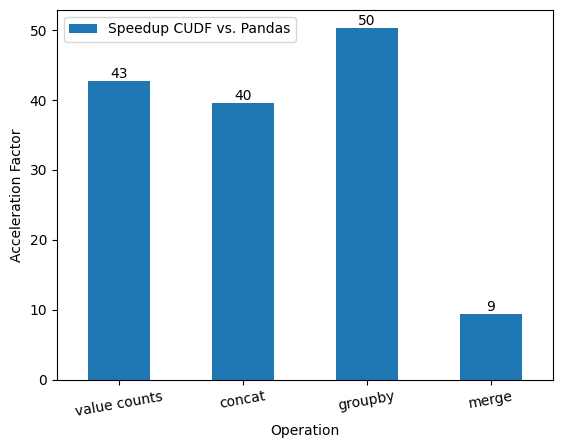

In [36]:
ax = performance_df.plot.bar(
    xlabel = "Operation",
    ylabel = "Acceleration Factor",
    rot = 10
)
ax.bar_label(ax.containers[0], fmt="%.0f");

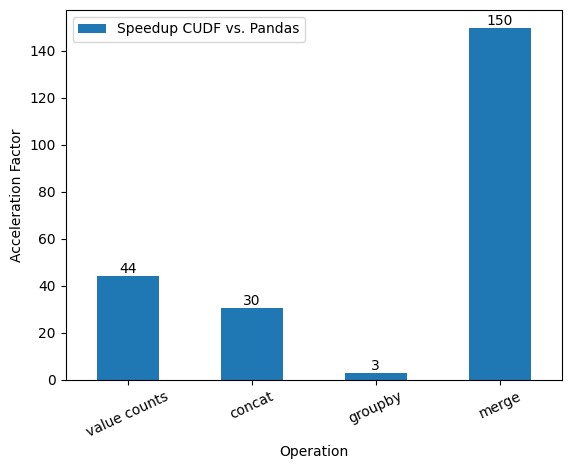

In [ ]:
ax = performance_df.plot.bar(
    xlabel = "Operation",
    ylabel = "Acceleration Factor",
    rot = 25
)
ax.bar_label(ax.containers[0], fmt="%.0f");

## Acceleration for strings

In [37]:
num_rows = 10_000_000
pandas_s = pd.Series (np.random.choice(["Google", "Amazon", "Apple", "Microsoft", "Netflix"], size = num_rows))

In [38]:
type(pandas_s)

pandas.core.series.Series

In [39]:
pandas_s.shape

(10000000,)

In [40]:
pandas_s

,0
0,Netflix
1,Netflix
2,Netflix
3,Amazon
4,Google
...,...
9999995,Google
9999996,Google
9999997,Google
9999998,Netflix


In [41]:
cudf_s = cudf.from_pandas(pandas_s)

In [42]:
cudf_s

0          Netflix
1          Netflix
2          Netflix
3           Amazon
4           Google
            ...   
9999995     Google
9999996     Google
9999997     Google
9999998    Netflix
9999999     Amazon
Length: 10000000, dtype: object

In [43]:
type(cudf_s)

cudf.core.series.Series

### upper

In [44]:
pandas_upper, cudf_upper = timeit_pandas_cudf(pandas_s, cudf_s, lambda s: s.str.upper(), number = 20)

In [ ]:
pandas_upper = timeit_pandas (pandas_s, lambda s: s.str.upper(), number = 20)

In [ ]:
pandas_upper

56.889394536000054

In [45]:
pandas_upper, cudf_upper

(60.230060619999904, 0.2626007320000099)

### contains

In [46]:
pandas_contains, cudf_contains = timeit_pandas_cudf(pandas_s, cudf_s,
                                                    lambda s: s.str.contains(r"[0-9][a-z]"), number = 20) # 1d, 5i

In [ ]:
pandas_contains = timeit_pandas (pandas_s, lambda s: s.str.contains(r"[0-9][a-z]"), number = 20) # 1d, 5i

In [ ]:
pandas_contains

74.88740569699985

In [47]:
pandas_contains, cudf_contains

(81.66428421599994, 0.5147333169998092)

### isalpha

In [48]:
pandas_isalpha, cudf_isalpha = timeit_pandas_cudf(pandas_s, cudf_s, lambda s: s.str.isalpha(), number = 20)

In [ ]:
pandas_isalpha = timeit_pandas (pandas_s, lambda s: s.str.isalpha(), number = 20)

In [ ]:
pandas_isalpha

40.216303298000184

In [50]:
pandas_isalpha, cudf_isalpha # (59.3582706899997, 0.06884636900031182)

(49.91611436900007, 0.05163484700005938)

> Comparing the results


In [51]:
performance_df = pd.DataFrame(
    {
        "Speedup cuDF vs. Pandas": [
            pandas_upper / cudf_upper,
            pandas_contains / cudf_contains,
            pandas_isalpha / cudf_isalpha,
        ],
    },
    index=["upper", "contains", "isalpha"],
)

In [ ]:
performance_df = pd.DataFrame(
    {
        "speedup cudf vs. pandas": [
            pandas_upper,
            pandas_contains,
            pandas_isalpha,
        ],
    },
    index=["upper", "contains", "isalpha"],
)

In [52]:
performance_df

,Speedup cuDF vs. Pandas
upper,229.359835
contains,158.653581
isalpha,966.713707


> Visualizing the chart

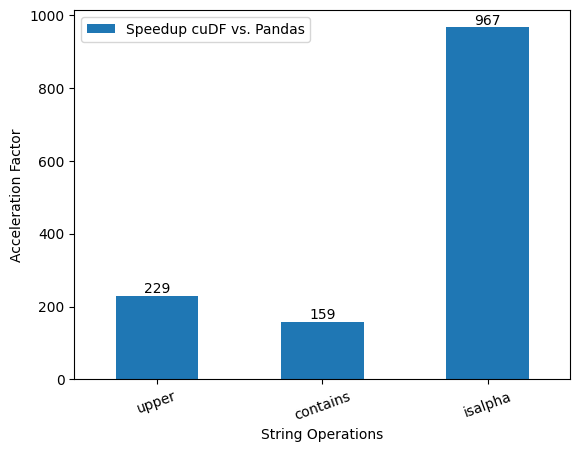

In [53]:
ax = performance_df.plot.bar(
    xlabel = "String Operations",
    ylabel = "Acceleration Factor",
    rot = 20
)
ax.bar_label(ax.containers[0], fmt="%.0f");

> Some additional differences between cuDF and Pandas

* https://docs.rapids.ai/api/cudf/stable/user_guide/pandas-comparison/

# Running locally

Local machine: a practical way to keep the environment working is through NGC - NVIDIA's neural network and container model repository.

* To run it on your machine, just follow the steps
https://catalog.ngc.nvidia.com/orgs/nvidia/teams/rapidsai/containers/rapidsai
  * There is Base and Runtime - the latter comes with some code examples inside
  * Prerequisites: Docker CE, CUDA Drive (from your GPU), NVIDIA docker plugin (so that docker can access the GPU); and then run the listed commands.
  * Note: When installing the NVIDIA driver for your video card, details about your GPU must appear when executing the command:
!nvidia-smi
so we know if the driver was installed correctly.
  * See the installation command in the link (it will depend on the OS and environment)
